# Tiempo en el que se alinea un dipolo magnético a un campo magnético

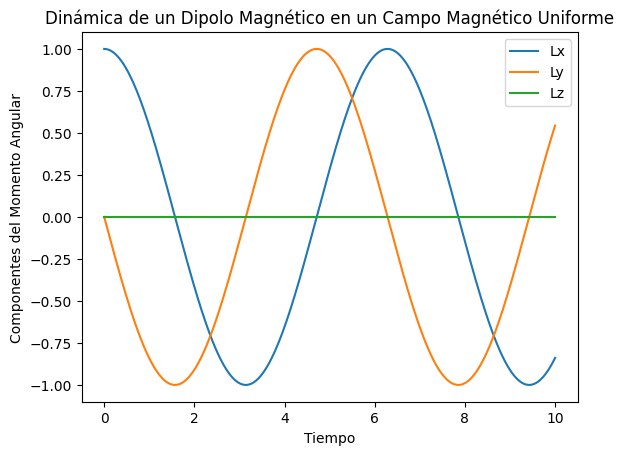

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Definir el campo magnético y las propiedades del dipolo
B = 1.0  # Magnitud del campo magnético
I = 1.0  # Momento de inercia del dipolo

# Función que define las ecuaciones diferenciales
def dipole_dynamics(L, t, B, I):
    Lx, Ly, Lz = L
    omega = L / I
    mx, my, mz = omega  # Asumiendo que el momento magnético es proporcional a la velocidad angular
    dLx_dt = my * B
    dLy_dt = -mx * B
    dLz_dt = 0
    return [dLx_dt, dLy_dt, dLz_dt]

# Condiciones iniciales (momento angular inicial)
L_initial = [1.0, 0.0, 0.0]  # No alineado inicialmente con el campo magnético

# Crear un rango de tiempo para la solución
t = np.linspace(0, 10, 1000)  # Ajustar según sea necesario

# Resolver las ecuaciones diferenciales
solution = odeint(dipole_dynamics, L_initial, t, args=(B, I))

# Graficar los resultados
plt.plot(t, solution[:, 0], label='Lx')
plt.plot(t, solution[:, 1], label='Ly')
plt.plot(t, solution[:, 2], label='Lz')
plt.xlabel('Tiempo')
plt.ylabel('Componentes del Momento Angular')
plt.title('Dinámica de un Dipolo Magnético en un Campo Magnético Uniforme')
plt.legend()
plt.show()


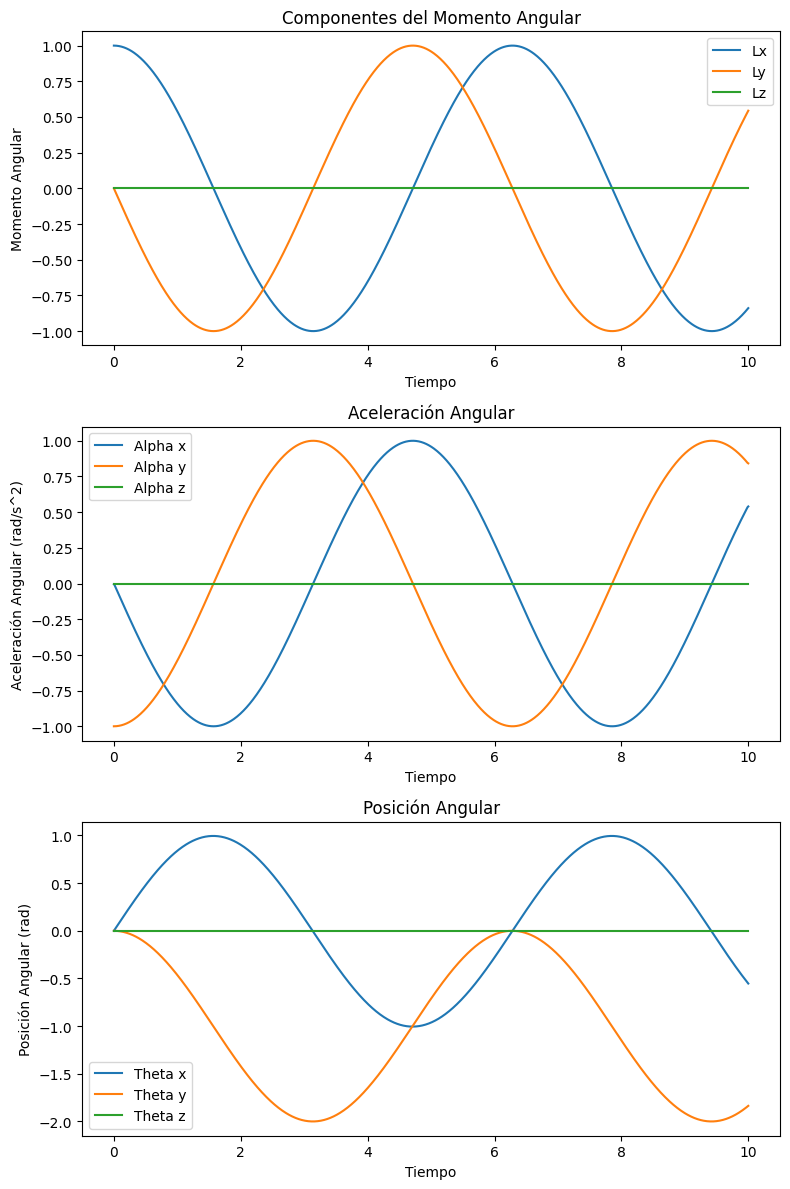

In [2]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Definir el campo magnético y las propiedades del dipolo
B = 1.0  # Magnitud del campo magnético
I = 1.0  # Momento de inercia del dipolo

# Función que define las ecuaciones diferenciales
def dipole_dynamics(L, t, B, I):
    Lx, Ly, Lz = L
    omega = L / I
    mx, my, mz = omega  # Asumiendo que el momento magnético es proporcional a la velocidad angular
    dLx_dt = my * B
    dLy_dt = -mx * B
    dLz_dt = 0
    return [dLx_dt, dLy_dt, dLz_dt]

# Condiciones iniciales (momento angular inicial)
L_initial = [1.0, 0.0, 0.0]  # No alineado inicialmente con el campo magnético

# Crear un rango de tiempo para la solución
t = np.linspace(0, 10, 1000)  # Ajustar según sea necesario

# Resolver las ecuaciones diferenciales
solution = odeint(dipole_dynamics, L_initial, t, args=(B, I))

# Calcular la velocidad angular y la aceleración angular
omega = solution / I
alpha = np.gradient(omega, t, axis=0)  # Aceleración angular

# Calcular la diferencia de tiempo
dt = np.diff(t, prepend=t[0])

# Calcular la posición angular integrando la velocidad angular
theta = np.cumsum(omega * dt[:, np.newaxis], axis=0)

# Graficar los resultados
fig, axs = plt.subplots(3, 1, figsize=(8, 12))

# Momento angular
axs[0].plot(t, solution[:, 0], label='Lx')
axs[0].plot(t, solution[:, 1], label='Ly')
axs[0].plot(t, solution[:, 2], label='Lz')
axs[0].set_title('Componentes del Momento Angular')
axs[0].set_xlabel('Tiempo')
axs[0].set_ylabel('Momento Angular')
axs[0].legend()

# Aceleración angular
axs[1].plot(t, alpha[:, 0], label='Alpha x')
axs[1].plot(t, alpha[:, 1], label='Alpha y')
axs[1].plot(t, alpha[:, 2], label='Alpha z')
axs[1].set_title('Aceleración Angular')
axs[1].set_xlabel('Tiempo')
axs[1].set_ylabel('Aceleración Angular (rad/s^2)')
axs[1].legend()

# Posición angular
axs[2].plot(t, theta[:, 0], label='Theta x')
axs[2].plot(t, theta[:, 1], label='Theta y')
axs[2].plot(t, theta[:, 2], label='Theta z')
axs[2].set_title('Posición Angular')
axs[2].set_xlabel('Tiempo')
axs[2].set_ylabel('Posición Angular (rad)')
axs[2].legend()

plt.tight_layout()
plt.show()


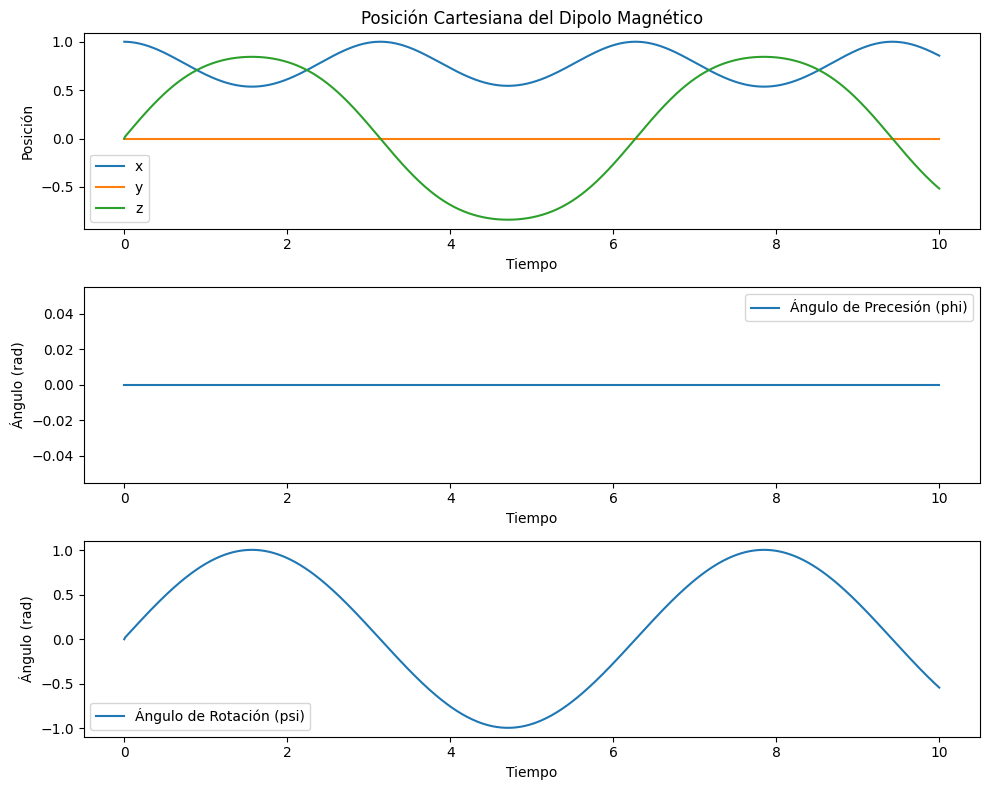

In [3]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Definir el campo magnético y las propiedades del dipolo
B = 1.0  # Magnitud del campo magnético
I = 1.0  # Momento de inercia del dipolo

# Función que define las ecuaciones diferenciales
def dipole_dynamics(L, t, B, I):
    Lx, Ly, Lz = L
    omega = L / I
    mx, my, mz = omega  # Asumiendo que el momento magnético es proporcional a la velocidad angular
    dLx_dt = my * B
    dLy_dt = -mx * B
    dLz_dt = 0
    return [dLx_dt, dLy_dt, dLz_dt]

# Condiciones iniciales (momento angular inicial)
L_initial = [1.0, 0.0, 0.0]  # No alineado inicialmente con el campo magnético

# Crear un rango de tiempo para la solución
t = np.linspace(0, 10, 1000)  # Ajustar según sea necesario

# Resolver las ecuaciones diferenciales
solution = odeint(dipole_dynamics, L_initial, t, args=(B, I))

# Calcular la velocidad angular
omega = solution / I

# Calcular la orientación (ángulos de Euler) integrando la velocidad angular
# Asumiendo que el eje de precesión es el eje z y el eje de rotación es el eje x o y
phi = np.cumsum(omega[:, 2]) * np.diff(t, prepend=t[0])  # Ángulo de precesión alrededor del eje z
psi = np.cumsum(omega[:, 0]) * np.diff(t, prepend=t[0])  # Ángulo de rotación alrededor del eje x

# Convertir ángulos de Euler a coordenadas cartesianas
# Asumiendo que el dipolo se extiende a lo largo del eje x local
x = np.cos(phi) * np.cos(psi)
y = np.sin(phi) * np.cos(psi)
z = np.sin(psi)

# Graficar los resultados
plt.figure(figsize=(10, 8))
plt.subplot(311)
plt.plot(t, x, label='x')
plt.plot(t, y, label='y')
plt.plot(t, z, label='z')
plt.title('Posición Cartesiana del Dipolo Magnético')
plt.xlabel('Tiempo')
plt.ylabel('Posición')
plt.legend()

plt.subplot(312)
plt.plot(t, phi, label='Ángulo de Precesión (phi)')
plt.xlabel('Tiempo')
plt.ylabel('Ángulo (rad)')
plt.legend()

plt.subplot(313)
plt.plot(t, psi, label='Ángulo de Rotación (psi)')
plt.xlabel('Tiempo')
plt.ylabel('Ángulo (rad)')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from scipy.integrate import odeint
from IPython.display import HTML
import matplotlib

# Aumenta el límite de tamaño para la animación incrustada
matplotlib.rcParams['animation.embed_limit'] = 2**128

# Definir el campo magnético y las propiedades del dipolo
B = 4.0  # Magnitud del campo magnético
I = 1.0  # Momento de inercia del dipolo

# Función que define las ecuaciones diferenciales
def dipole_dynamics(L, t, B, I):
    Lx, Ly, Lz = L
    omega = L / I
    mx, my, mz = omega
    dLx_dt = my * B
    dLy_dt = -mx * B
    dLz_dt = 0
    return [dLx_dt, dLy_dt, dLz_dt]

# Condiciones iniciales (momento angular inicial)
L_initial = [1.0, 0.0, 0.0]

# Crear un rango de tiempo para la solución
t = np.linspace(0, 10, 500)

# Resolver las ecuaciones diferenciales
solution = odeint(dipole_dynamics, L_initial, t, args=(B, I))

# Calcular la velocidad angular y la posición angular
omega = solution / I
phi = np.cumsum(omega[:, 2]) * np.diff(t, prepend=t[0])
theta = np.cumsum(omega[:, 0]) * np.diff(t, prepend=t[0])

# Función para actualizar la animación
def update(frame, line, phi, theta):
    x = np.sin(theta[frame]) * np.cos(phi[frame])
    y = np.sin(theta[frame]) * np.sin(phi[frame])
    z = np.cos(theta[frame])
    
    line.set_data([0, x], [0, y])
    line.set_3d_properties([0, z])
    return line,

# Crear la figura para la animación
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Línea que representa el dipolo
line, = ax.plot([], [], [], 'r-', lw=2)

# Configurar los límites y etiquetas del gráfico
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Crear la animación
ani = FuncAnimation(fig, update, frames=len(t), fargs=(line, phi, theta), blit=True)

HTML(ani.to_jshtml())


-------------

# Campo cerca de los extremos de un imán barra

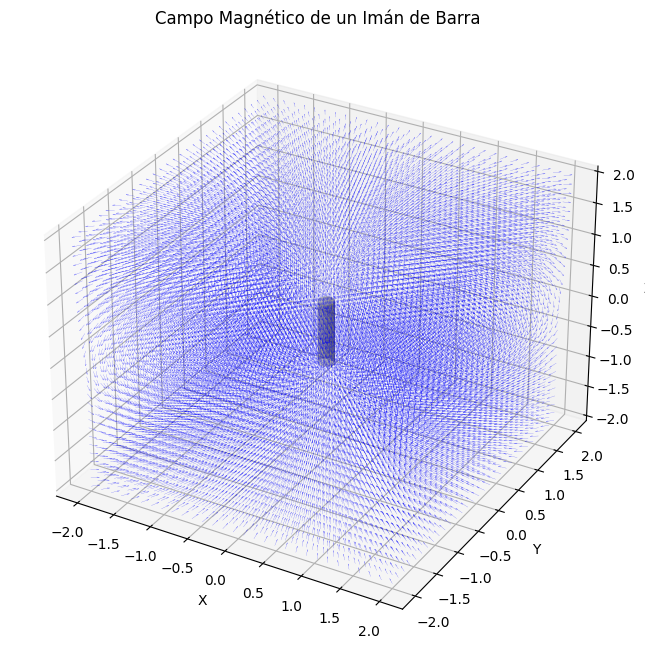

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def magnetic_field_dipole(moment, r_vector):
    mu_0 = 4 * np.pi * 1E-7  # Permeabilidad del vacío
    r = np.linalg.norm(r_vector)
    r_hat = r_vector / r
    B = (mu_0 / (4 * np.pi * r**3)) * (3 * np.dot(moment, r_hat) * r_hat - moment)
    return B

# Configuración del imán de barra
length = 1.0
radius = 0.1  # Radio del cilindro que representa el imán
n_dipoles = 10
dipole_moments = np.array([[0, 0, 1]] * n_dipoles)
dipole_positions = np.linspace(-length / 2, length / 2, n_dipoles)[:, None] * np.array([[0, 0, 1]])

# Puntos en el espacio para el campo magnético
x = np.linspace(-2, 2, 30)
y = np.linspace(-2, 2, 30)
z = np.linspace(-2, 2, 30)
X, Y, Z = np.meshgrid(x, y, z)

# Calcular el campo magnético
Bx, By, Bz = np.zeros_like(X), np.zeros_like(Y), np.zeros_like(Z)
for moment, position in zip(dipole_moments, dipole_positions):
    r_vectors = np.stack((X - position[0], Y - position[1], Z - position[2]), axis=-1)
    B = np.array([magnetic_field_dipole(moment, r_vector) for r_vector in r_vectors.reshape(-1, 3)])
    Bx += B[:, 0].reshape(X.shape)
    By += B[:, 1].reshape(Y.shape)
    Bz += B[:, 2].reshape(Z.shape)

# Visualización del campo magnético y del imán
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Dibujar el cilindro que representa el imán
theta = np.linspace(0, 2 * np.pi, 100)
x_cylinder = radius * np.cos(theta)
y_cylinder = radius * np.sin(theta)
z_cylinder = np.linspace(-length / 2, length / 2, 100)
X_cylinder, Z_cylinder = np.meshgrid(x_cylinder, z_cylinder)
Y_cylinder, Z_cylinder = np.meshgrid(y_cylinder, z_cylinder)
ax.plot_surface(X_cylinder, Y_cylinder, Z_cylinder, color='gray', alpha=0.5)

# Dibujar el campo magnético
ax.quiver(X, Y, Z, Bx, By, Bz, length=0.1, normalize=True, color='b', linewidths=0.1)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Campo Magnético de un Imán de Barra')

plt.show()


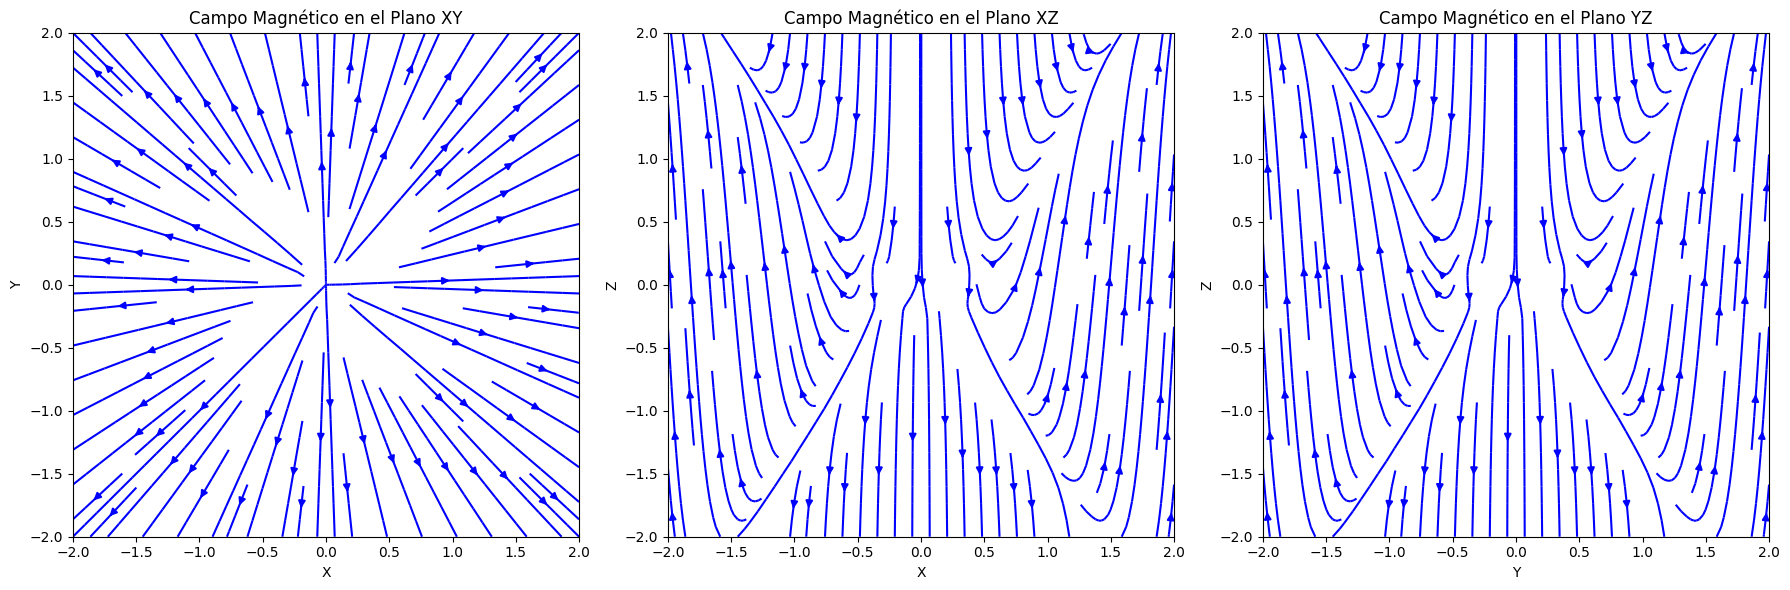

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def magnetic_field_dipole(moment, r_vector):
    mu_0 = 4 * np.pi * 1E-7  # Permeabilidad del vacío
    r = np.linalg.norm(r_vector)
    r_hat = r_vector / r
    B = (mu_0 / (4 * np.pi * r**3)) * (3 * np.dot(moment, r_hat) * r_hat - moment)
    return B

# Configuración del imán de barra
length = 1.0
radius = 0.1  # Radio del cilindro que representa el imán
n_dipoles = 10
dipole_moments = np.array([[0, 0, 1]] * n_dipoles)
dipole_positions = np.linspace(-length / 2, length / 2, n_dipoles)[:, None] * np.array([[0, 0, 1]])

# Puntos en el espacio para el campo magnético
x = np.linspace(-2, 2, 30)
y = np.linspace(-2, 2, 30)
z = np.linspace(-2, 2, 30)
X, Y, Z = np.meshgrid(x, y, z)

# Calcular el campo magnético
Bx, By, Bz = np.zeros_like(X), np.zeros_like(Y), np.zeros_like(Z)
for moment, position in zip(dipole_moments, dipole_positions):
    r_vectors = np.stack((X - position[0], Y - position[1], Z - position[2]), axis=-1)
    B = np.array([magnetic_field_dipole(moment, r_vector) for r_vector in r_vectors.reshape(-1, 3)])
    Bx += B[:, 0].reshape(X.shape)
    By += B[:, 1].reshape(Y.shape)
    Bz += B[:, 2].reshape(Z.shape)

# Visualización del campo magnético en planos 2D
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plano XY en z = 0
ax = axes[0]
Bx_xy, By_xy = Bx[:, :, z.size // 2], By[:, :, z.size // 2]
ax.streamplot(x, y, Bx_xy, By_xy, color='b')
ax.set_title('Campo Magnético en el Plano XY')
ax.set_xlabel('X')
ax.set_ylabel('Y')

# Plano XZ en y = 0
ax = axes[1]
Bx_xz, Bz_xz = Bx[:, y.size // 2, :], Bz[:, y.size // 2, :]
ax.streamplot(x, z, Bx_xz, Bz_xz, color='b')
ax.set_title('Campo Magnético en el Plano XZ')
ax.set_xlabel('X')
ax.set_ylabel('Z')

# Plano YZ en x = 0
ax = axes[2]
By_yz, Bz_yz = By[x.size // 2, :, :], Bz[x.size // 2, :, :]
ax.streamplot(y, z, By_yz, Bz_yz, color='b')
ax.set_title('Campo Magnético en el Plano YZ')
ax.set_xlabel('Y')
ax.set_ylabel('Z')

plt.tight_layout()
plt.show()


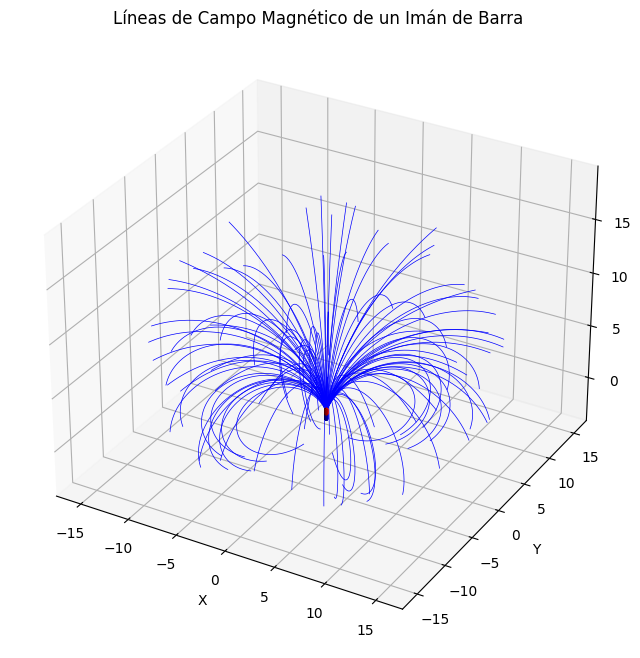

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import odeint

def magnetic_field_dipole(moment, r_vector):
    mu_0 = 4 * np.pi * 1E-7  # Permeabilidad del vacío
    r = np.linalg.norm(r_vector)
    if r == 0:
        return np.array([0, 0, 0])
    r_hat = r_vector / r
    B = (mu_0 / (4 * np.pi * r**3)) * (3 * np.dot(moment, r_hat) * r_hat - moment)
    return B

def field_line(moment, start_point, steps, step_size):
    def func(r, t):
        B = magnetic_field_dipole(moment, r)
        return B / np.linalg.norm(B) if np.linalg.norm(B) > 0 else [0, 0, 0]
    
    t = np.linspace(0, steps * step_size, steps)
    return odeint(func, start_point, t)

# Configuración del imán de barra
length = 1.0
radius = 0.1
moment = np.array([0, 0, 1])

# Puntos de inicio para las líneas de campo
n_points = 10
start_points = np.array([[x, y, -length / 2] 
                         for x in np.linspace(-radius, radius, n_points) for y in np.linspace(-radius, radius, n_points)])

# Visualización del campo magnético en 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Dibujar líneas de campo magnético
for point in start_points:
    line = field_line(moment, point, 1000, 0.02)
    ax.plot(line[:, 0], line[:, 1], line[:, 2], color='b', lw=0.5)

# Dibujar el cilindro que representa el imán
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(-length / 2, length / 2, 100)
x_cylinder = radius * np.outer(np.cos(u), np.ones_like(v))
y_cylinder = radius * np.outer(np.sin(u), np.ones_like(v))
z_cylinder = np.outer(np.ones_like(u), v)
ax.plot_surface(x_cylinder, y_cylinder, z_cylinder, color='gray', alpha=0.5, 
                facecolors=np.where(z_cylinder > 0, 'red', 'blue'))

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Líneas de Campo Magnético de un Imán de Barra')

plt.show()


# Líneas del vector potencial con magnitud constante de un dipolo magnético

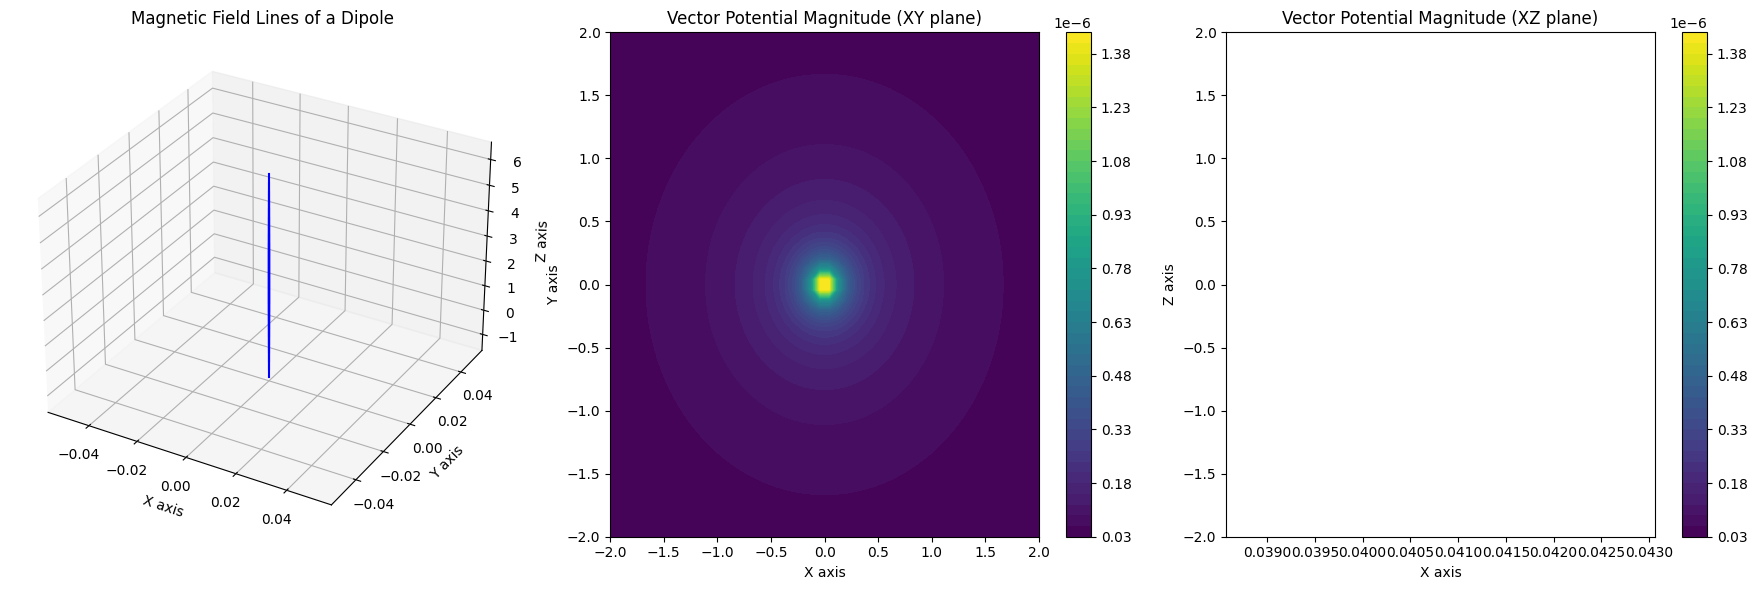

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import odeint

def magnetic_field_dipole(moment, r_vector):
    mu_0 = 4 * np.pi * 1E-7
    r = np.linalg.norm(r_vector)
    if r == 0:
        return np.array([0, 0, 0])
    r_hat = r_vector / r
    B = (mu_0 / (4 * np.pi * r**3)) * (3 * np.dot(moment, r_hat) * r_hat - moment)
    return B

def vector_potential_dipole(moment, r_vector):
    mu_0 = 4 * np.pi * 1E-7
    r = np.linalg.norm(r_vector)
    A = (mu_0 / (4 * np.pi * r)) * moment
    return A

def field_line(moment, start_point, steps, step_size):
    def func(r, t):
        B = magnetic_field_dipole(moment, r)
        return B / np.linalg.norm(B) if np.linalg.norm(B) > 0 else [0, 0, 0]
    
    t = np.linspace(0, steps * step_size, steps)
    return odeint(func, start_point, t)

moment = np.array([0, 0, 1])  # Dipole moment

# Set up the grid in space
grid_size = 50
x = np.linspace(-2, 2, grid_size)
y = np.linspace(-2, 2, grid_size)
z = np.linspace(-2, 2, grid_size)
X, Y, Z = np.meshgrid(x, y, z)

# Calculate the vector potential on the grid
Ax, Ay, Az = np.zeros_like(X), np.zeros_like(Y), np.zeros_like(Z)
for i in range(grid_size):
    for j in range(grid_size):
        for k in range(grid_size):
            r_vector = np.array([X[i, j, k], Y[i, j, k], Z[i, j, k]])
            A = vector_potential_dipole(moment, r_vector)
            Ax[i, j, k], Ay[i, j, k], Az[i, j, k] = A

# Calculate the magnitude of the vector potential
A_magnitude = np.sqrt(Ax**2 + Ay**2 + Az**2)

# Plot the field lines and vector potential
fig = plt.figure(figsize=(18, 6))

# Field lines plot
ax1 = fig.add_subplot(131, projection='3d')
start_points = [[0, 0, z] for z in np.linspace(-1.5, 1.5, 10)]
for point in start_points:
    line = field_line(moment, point, 500, 0.01)
    ax1.plot(line[:, 0], line[:, 1], line[:, 2], color='b')
ax1.set_xlabel('X axis')
ax1.set_ylabel('Y axis')
ax1.set_zlabel('Z axis')
ax1.set_title('Magnetic Field Lines of a Dipole')

# Vector potential magnitude plot (XY plane at Z=0)
ax2 = fig.add_subplot(132)
cp = ax2.contourf(X[:, :, grid_size // 2], Y[:, :, grid_size // 2], A_magnitude[:, :, grid_size // 2], levels=50, cmap='viridis')
fig.colorbar(cp, ax=ax2)
ax2.set_xlabel('X axis')
ax2.set_ylabel('Y axis')
ax2.set_title('Vector Potential Magnitude (XY plane)')

# Vector potential magnitude plot (XZ plane at Y=0)
ax3 = fig.add_subplot(133)
cp = ax3.contourf(X[:, grid_size // 2, :], Z[:, grid_size // 2, :], A_magnitude[:, grid_size // 2, :], levels=50, cmap='viridis')
fig.colorbar(cp, ax=ax3)
ax3.set_xlabel('X axis')
ax3.set_ylabel('Z axis')
ax3.set_title('Vector Potential Magnitude (XZ plane)')

plt.tight_layout()
plt.show()


C:\Users\clauz\AppData\Local\Temp\ipykernel_37604\3779845496.py:64: UserWarning: No contour levels were found within the data range.
  cp = ax.contour(X[:, :, grid_size // 2], Y[:, :, grid_size // 2], A_magnitude[:, :, grid_size // 2], levels=[level], zdir='z', offset=z_plane, cmap='viridis')


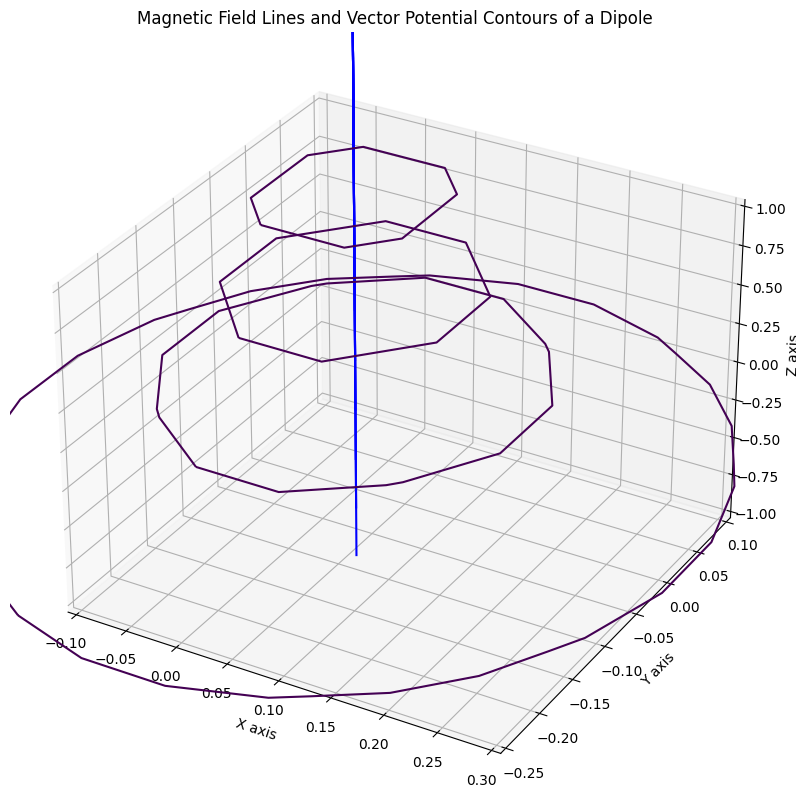

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import odeint

def magnetic_field_dipole(moment, r_vector):
    mu_0 = 4 * np.pi * 1E-7
    r = np.linalg.norm(r_vector)
    if r == 0:
        return np.array([0, 0, 0])
    r_hat = r_vector / r
    B = (mu_0 / (4 * np.pi * r**3)) * (3 * np.dot(moment, r_hat) * r_hat - moment)
    return B

def vector_potential_dipole(moment, r_vector):
    mu_0 = 4 * np.pi * 1E-7
    r = np.linalg.norm(r_vector)
    A = (mu_0 / (4 * np.pi * r)) * moment
    return A

def field_line(moment, start_point, steps, step_size):
    def func(r, t):
        B = magnetic_field_dipole(moment, r)
        return B / np.linalg.norm(B) if np.linalg.norm(B) > 0 else [0, 0, 0]
    
    t = np.linspace(0, steps * step_size, steps)
    return odeint(func, start_point, t)

moment = np.array([0, 0, 1])  # Dipole moment

# Set up the grid in space
grid_size = 50
x = np.linspace(-2, 2, grid_size)
y = np.linspace(-2, 2, grid_size)
z = np.linspace(-2, 2, grid_size)
X, Y, Z = np.meshgrid(x, y, z)

# Calculate the vector potential on the grid
Ax, Ay, Az = np.zeros_like(X), np.zeros_like(Y), np.zeros_like(Z)
for i in range(grid_size):
    for j in range(grid_size):
        for k in range(grid_size):
            r_vector = np.array([X[i, j, k], Y[i, j, k], Z[i, j, k]])
            A = vector_potential_dipole(moment, r_vector)
            Ax[i, j, k], Ay[i, j, k], Az[i, j, k] = A

# Calculate the magnitude of the vector potential
A_magnitude = np.sqrt(Ax**2 + Ay**2 + Az**2)

# Plot the field lines and vector potential
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot field lines
start_points = [[0, 0, z] for z in np.linspace(-1.5, 1.5, 10)]
for point in start_points:
    line = field_line(moment, point, 500, 0.01)
    ax.plot(line[:, 0], line[:, 1], line[:, 2], color='b')

# Plot contours of constant vector potential magnitude
contour_levels = [np.min(A_magnitude) + i * (np.max(A_magnitude) - np.min(A_magnitude)) / 5 for i in range(6)]
z_planes = np.linspace(-1.5, 1.5, len(contour_levels))  # Heights for contour planes
for level, z_plane in zip(contour_levels, z_planes):
    cp = ax.contour(X[:, :, grid_size // 2], Y[:, :, grid_size // 2], A_magnitude[:, :, grid_size // 2], levels=[level], zdir='z', offset=z_plane, cmap='viridis')

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('Magnetic Field Lines and Vector Potential Contours of a Dipole')
ax.set_xlim([-0.1, 0.3])
ax.set_ylim([-0.25, 0.1])
ax.set_zlim([-1, 1])

plt.show()


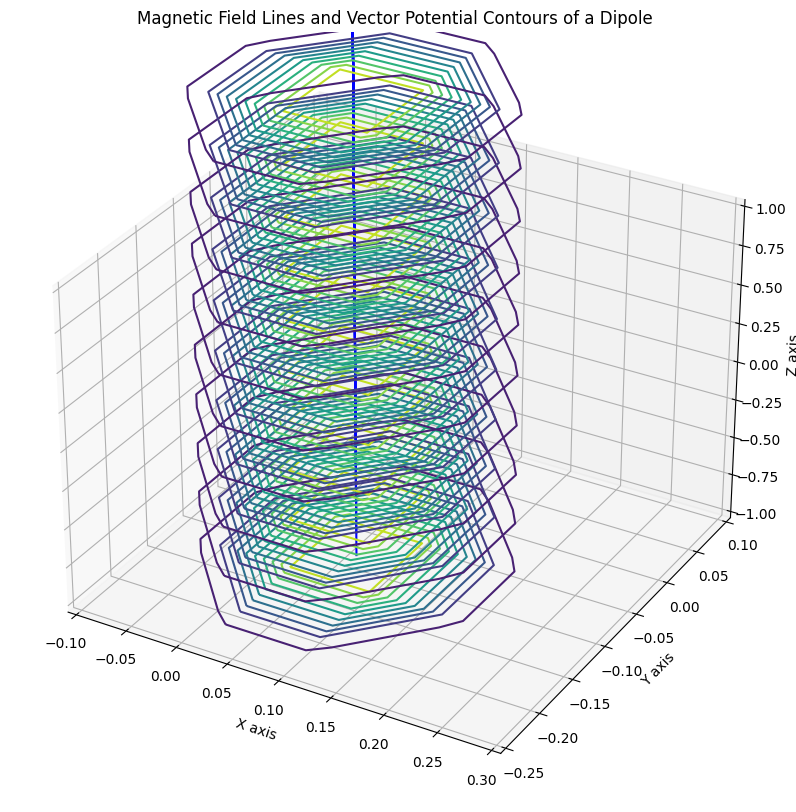

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import odeint

def magnetic_field_dipole(moment, r_vector):
    mu_0 = 4 * np.pi * 1E-7
    r = np.linalg.norm(r_vector)
    if r == 0:
        return np.array([0, 0, 0])
    r_hat = r_vector / r
    B = (mu_0 / (4 * np.pi * r**3)) * (3 * np.dot(moment, r_hat) * r_hat - moment)
    return B

def field_line(moment, start_point, steps, step_size):
    def func(r, t):
        B = magnetic_field_dipole(moment, r)
        return B / np.linalg.norm(B) if np.linalg.norm(B) > 0 else [0, 0, 0]
    
    t = np.linspace(0, steps * step_size, steps)
    return odeint(func, start_point, t)

moment = np.array([0, 0, 1])  # Dipole moment

# Set up the grid in space
grid_size = 50
x = np.linspace(-2, 2, grid_size)
y = np.linspace(-2, 2, grid_size)
z = np.linspace(-2, 2, grid_size)
X, Y, Z = np.meshgrid(x, y, z)

# Calculate the vector potential on the grid
Ax, Ay, Az = np.zeros_like(X), np.zeros_like(Y), np.zeros_like(Z)
for i in range(grid_size):
    for j in range(grid_size):
        for k in range(grid_size):
            r_vector = np.array([X[i, j, k], Y[i, j, k], Z[i, j, k]])
            A = magnetic_field_dipole(moment, r_vector)
            Ax[i, j, k], Ay[i, j, k], Az[i, j, k] = A

# Calculate the magnitude of the vector potential
A_magnitude = np.sqrt(Ax**2 + Ay**2 + Az**2)

# Plot the field lines and vector potential
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot field lines
n_lines = 20  # Number of field lines
start_points = np.array([[0, 0, z] for z in np.linspace(-1.5, 1.5, n_lines)])
for point in start_points:
    line = field_line(moment, point, 500, 0.01)
    ax.plot(line[:, 0], line[:, 1], line[:, 2], color='b')

# Plot contours of constant vector potential magnitude
contour_levels = 10
z_planes = np.linspace(-1.5, 1.5, contour_levels)
for z_plane in z_planes:
    cp = ax.contour(X[:, :, grid_size // 2], Y[:, :, grid_size // 2], A_magnitude[:, :, grid_size // 2], levels=10, zdir='z', offset=z_plane, cmap='viridis')

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('Magnetic Field Lines and Vector Potential Contours of a Dipole')
ax.set_xlim([-0.1, 0.3])
ax.set_ylim([-0.25, 0.1])
ax.set_zlim([-1, 1])

plt.show()


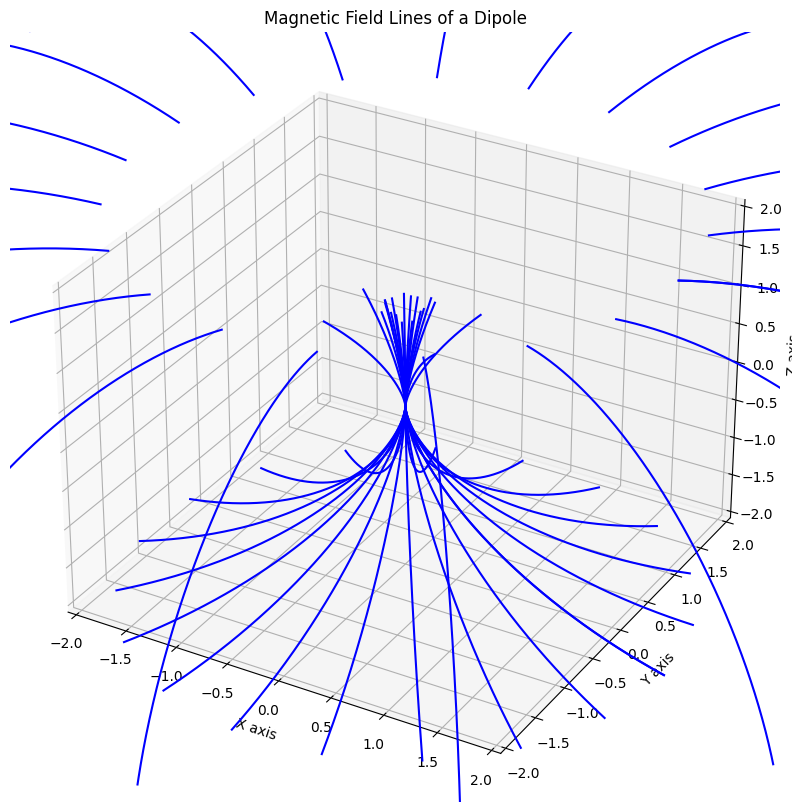

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import odeint

def magnetic_field_dipole(moment, r_vector):
    mu_0 = 4 * np.pi * 1E-7
    r = np.linalg.norm(r_vector)
    if r == 0:
        return np.array([0, 0, 0])
    r_hat = r_vector / r
    B = (mu_0 / (4 * np.pi * r**3)) * (3 * np.dot(moment, r_hat) * r_hat - moment)
    return B

def field_line(moment, start_point, steps, step_size):
    def func(r, t):
        B = magnetic_field_dipole(moment, r)
        return B / np.linalg.norm(B) if np.linalg.norm(B) > 0 else [0, 0, 0]
    
    t = np.linspace(0, steps * step_size, steps)
    return odeint(func, start_point, t)

moment = np.array([0, 0, 1])  # Dipole moment

# Plot the field lines and vector potential
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot field lines
n_lines = 20  # Number of field lines
line_length = 2.5  # Length of field lines
for theta in np.linspace(0, 2*np.pi, n_lines):
    for z in np.linspace(-1, 1, 2):
        start_point = np.array([np.cos(theta), np.sin(theta), z]) * line_length
        line = field_line(moment, start_point, 500, 0.01)
        ax.plot(line[:, 0], line[:, 1], line[:, 2], color='b')

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('Magnetic Field Lines of a Dipole')
ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])
ax.set_zlim([-2, 2])

plt.show()


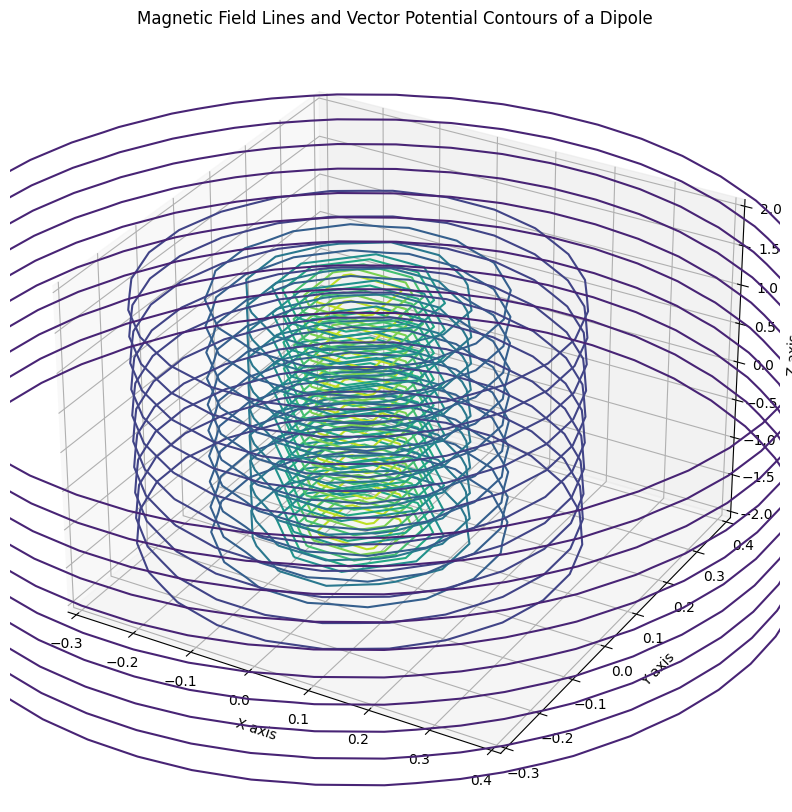

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import odeint

def magnetic_field_dipole(moment, r_vector):
    mu_0 = 4 * np.pi * 1E-7
    r = np.linalg.norm(r_vector)
    if r == 0:
        return np.array([0, 0, 0])
    r_hat = r_vector / r
    B = (mu_0 / (4 * np.pi * r**3)) * (3 * np.dot(moment, r_hat) * r_hat - moment)
    return B

def vector_potential_dipole(moment, r_vector):
    mu_0 = 4 * np.pi * 1E-7
    r = np.linalg.norm(r_vector)
    A = (mu_0 / (4 * np.pi * r)) * moment
    return A

def field_line(moment, start_point, steps, step_size):
    def func(r, t):
        B = magnetic_field_dipole(moment, r)
        return B / np.linalg.norm(B) if np.linalg.norm(B) > 0 else [0, 0, 0]
    
    t = np.linspace(0, steps * step_size, steps)
    return odeint(func, start_point, t)

moment = np.array([0, 0, 1])  # Dipole moment

# Set up the grid in space
grid_size = 50
x = np.linspace(-2, 2, grid_size)
y = np.linspace(-2, 2, grid_size)
z = np.linspace(-2, 2, grid_size)
X, Y, Z = np.meshgrid(x, y, z)

# Calculate the vector potential on the grid
Ax, Ay, Az = np.zeros_like(X), np.zeros_like(Y), np.zeros_like(Z)
for i in range(grid_size):
    for j in range(grid_size):
        for k in range(grid_size):
            r_vector = np.array([X[i, j, k], Y[i, j, k], Z[i, j, k]])
            A = vector_potential_dipole(moment, r_vector)
            Ax[i, j, k], Ay[i, j, k], Az[i, j, k] = A

# Calculate the magnitude of the vector potential
A_magnitude = np.sqrt(Ax**2 + Ay**2 + Az**2)

# Plot the field lines and vector potential
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot field lines
#n_lines = 20
#for theta in np.linspace(0, 2 * np.pi, n_lines):
#    for z_pos in [-1, 1]:
#        start_point = np.array([np.cos(theta), np.sin(theta), z_pos]) * 1.5
#        line = field_line(moment, start_point, 500, 0.01)
#        ax.plot(line[:, 0], line[:, 1], line[:, 2], color='b')

# Plot contours of constant vector potential magnitude
contour_levels = 10
z_planes = np.linspace(-1.5, 1.5, contour_levels)
for z_plane in z_planes:
    cp = ax.contour(X[:, :, grid_size // 2], Y[:, :, grid_size // 2], 
                    A_magnitude[:, :, grid_size // 2], levels=10, zdir='z', offset=z_plane, cmap='viridis')

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('Magnetic Field Lines and Vector Potential Contours of a Dipole')
ax.set_xlim([-0.3, 0.4])
ax.set_ylim([-0.3, 0.4])
ax.set_zlim([-2, 2])

plt.show()


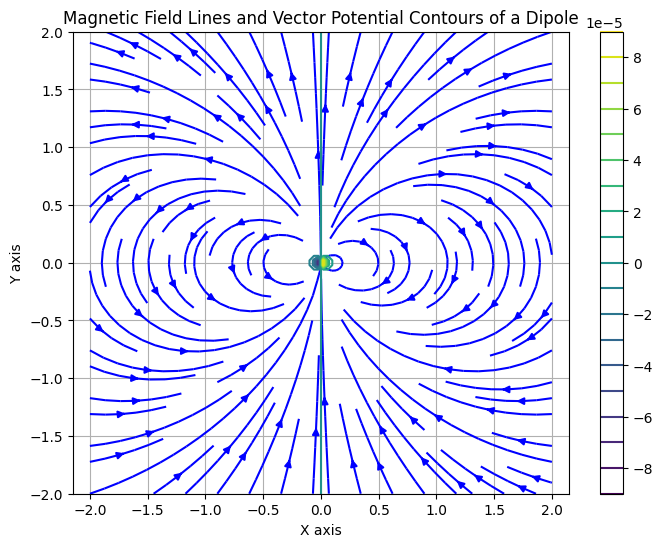

In [37]:
import numpy as np
import matplotlib.pyplot as plt

def magnetic_field_dipole(moment, x, y):
    mu_0 = 4 * np.pi * 1E-7
    r = np.sqrt(x**2 + y**2)
    Bx = mu_0 / (4 * np.pi) * (3 * x * y * moment / r**5)
    By = mu_0 / (4 * np.pi) * (3 * y**2 * moment / r**5 - moment / r**3)
    return Bx, By

def vector_potential_dipole(moment, x, y):
    mu_0 = 4 * np.pi * 1E-7
    r = np.sqrt(x**2 + y**2)
    Az = mu_0 / (4 * np.pi) * moment * x / r**3
    return Az

# Set up the grid in space
grid_size = 100
x = np.linspace(-2, 2, grid_size)
y = np.linspace(-2, 2, grid_size)
X, Y = np.meshgrid(x, y)

# Dipole moment
moment = 1

# Calculate the magnetic field
Bx, By = magnetic_field_dipole(moment, X, Y)

# Calculate the vector potential
Az = vector_potential_dipole(moment, X, Y)

# Create the plot
plt.figure(figsize=(8, 6))

# Plot magnetic field lines
plt.streamplot(X, Y, Bx, By, color='b', density=1)

# Plot contours of constant vector potential
contour_levels = 20
cp = plt.contour(X, Y, Az, levels=contour_levels, cmap='viridis')
plt.colorbar(cp)

plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.title('Magnetic Field Lines and Vector Potential Contours of a Dipole')
plt.grid(True)
plt.axis('equal')
plt.show()


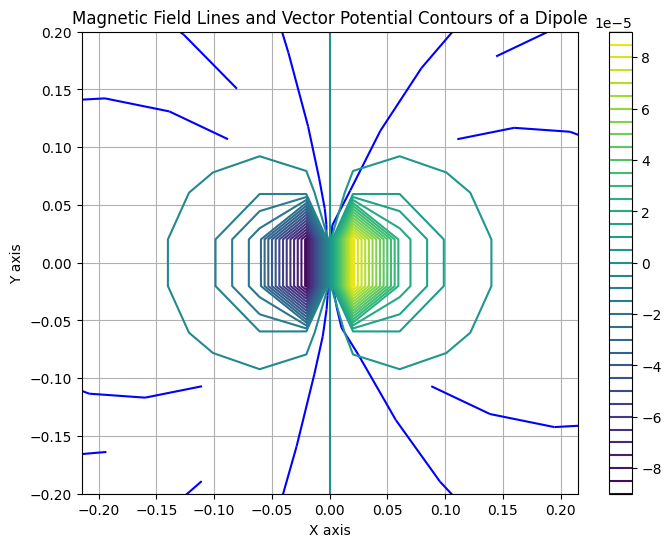

In [42]:
import numpy as np
import matplotlib.pyplot as plt

def magnetic_field_dipole(moment, x, y):
    mu_0 = 4 * np.pi * 1E-7
    r = np.sqrt(x**2 + y**2)
    Bx = mu_0 / (4 * np.pi) * (3 * x * y * moment / r**5)
    By = mu_0 / (4 * np.pi) * (3 * y**2 * moment / r**5 - moment / r**3)
    return Bx, By

def vector_potential_dipole(moment, x, y):
    mu_0 = 4 * np.pi * 1E-7
    r = np.sqrt(x**2 + y**2)
    Az = mu_0 / (4 * np.pi) * moment * x / r**3
    return Az

# Set up the grid in space
grid_size = 100
x = np.linspace(-2, 2, grid_size)
y = np.linspace(-2, 2, grid_size)
X, Y = np.meshgrid(x, y)

# Dipole moment
moment = 1

# Calculate the magnetic field
Bx, By = magnetic_field_dipole(moment, X, Y)

# Calculate the vector potential
Az = vector_potential_dipole(moment, X, Y)

# Create the plot
plt.figure(figsize=(8, 6))

# Plot magnetic field lines
plt.streamplot(X, Y, Bx, By, color='b', density=2)

# Plot contours of constant vector potential
contour_levels = 40  # Increased number of contour levels
cp = plt.contour(X, Y, Az, levels=contour_levels, cmap='viridis')
plt.colorbar(cp)

plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.title('Magnetic Field Lines and Vector Potential Contours of a Dipole')
plt.grid(True)
plt.axis('equal')
plt.xlim([-0.2, 0.2])
plt.ylim([-0.2, 0.2])

plt.show()


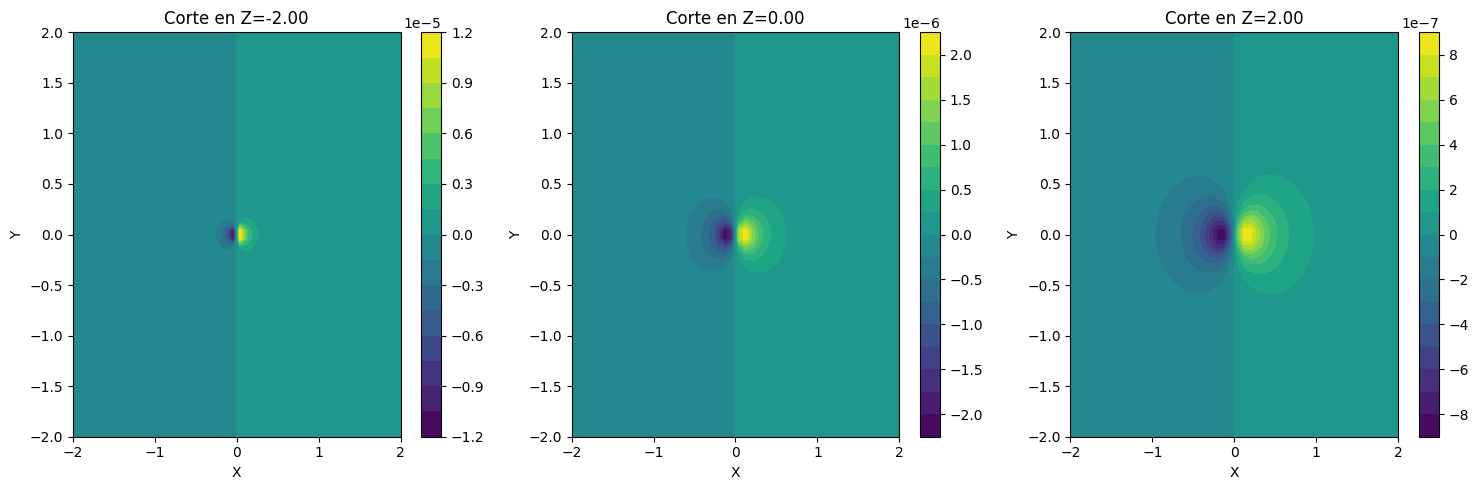

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def vector_potential_dipole(moment_magnitude, x, y, z):
    mu_0 = 4 * np.pi * 1E-7
    r = np.sqrt(x**2 + y**2 + z**2)
    r[r == 0] = 1e-10  # Evitar división por cero
    A = mu_0 / (4 * np.pi * r**3) * moment_magnitude * x
    return A

# Magnitud del momento dipolar
moment_magnitude = 1

# Crear una cuadrícula
grid_size = 50
x = np.linspace(-2, 2, grid_size)
y = np.linspace(-2, 2, grid_size)
z = np.linspace(-2, 2, grid_size)
X, Y, Z = np.meshgrid(x, y, z)

# Calcular el potencial vectorial
Az = vector_potential_dipole(moment_magnitude, X, Y, Z)

# Crear la figura
fig = plt.figure(figsize=(15, 5))

# Niveles de contorno
contour_levels = 20

# Trazar cortes en diferentes planos z
for i, z_val in enumerate(np.linspace(-2, 2, 3)):
    ax = fig.add_subplot(1, 3, i + 1)
    cp = ax.contourf(X[:, :, grid_size // 2 + i], Y[:, :, grid_size // 2 + i], Az[:, :, grid_size // 2 + i], levels=contour_levels, cmap='viridis')
    fig.colorbar(cp, ax=ax)
    ax.set_title(f'Corte en Z={z_val:.2f}')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')

plt.tight_layout()
plt.show()


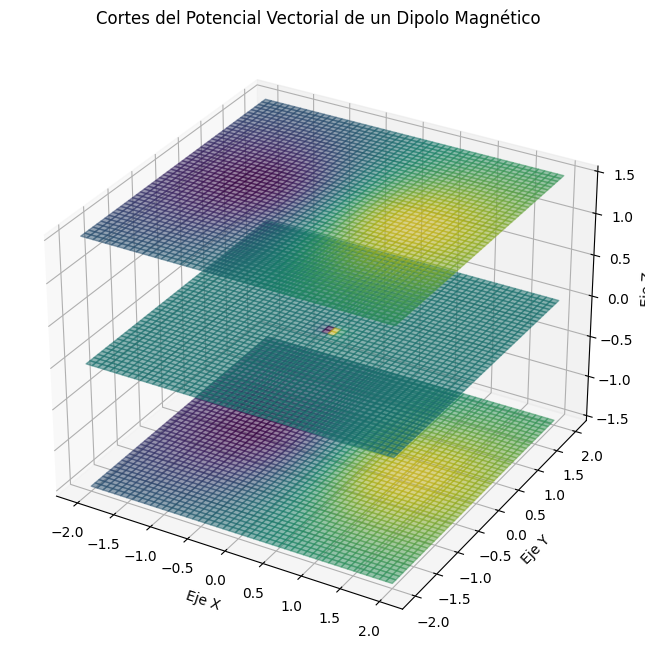

In [96]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def vector_potential_dipole(moment_magnitude, x, y, z):
    mu_0 = 4 * np.pi * 1E-7
    r = np.sqrt(x**2 + y**2 + z**2)
    r[r == 0] = 1e-10  # Evitar división por cero
    A = mu_0 / (4 * np.pi * r**3) * moment_magnitude * x
    return A

# Magnitud del momento dipolar
moment_magnitude = 1

# Crear una cuadrícula
grid_size = 50
x = np.linspace(-2, 2, grid_size)
y = np.linspace(-2, 2, grid_size)
z = np.linspace(-2, 2, grid_size)
X, Y, Z = np.meshgrid(x, y, z)

# Calcular el potencial vectorial
Az = vector_potential_dipole(moment_magnitude, X, Y, Z)

# Crear la figura
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Trazar cortes en diferentes planos z
z_values = [-1.5, 0 , 1.5]#np.linspace(-1.5, 1.5, 10)  # Valores de z para los cortes
for z_val in z_values:
    # Crear una cuadrícula para el plano actual
    X_plane, Y_plane = np.meshgrid(x, y)
    Z_plane = np.full_like(X_plane, z_val)

    # Calcular el potencial vectorial en este plano
    Az_plane = vector_potential_dipole(moment_magnitude, X_plane, Y_plane, z_val)

    # Trazar la superficie
    surf = ax.plot_surface(X_plane, Y_plane, Z_plane, 
                           facecolors=plt.cm.viridis(
                               (Az_plane - Az_plane.min()) / (Az_plane.max() - Az_plane.min())
                           ), alpha=0.5)

ax.set_xlabel('Eje X')
ax.set_ylabel('Eje Y')
ax.set_zlabel('Eje Z')
ax.set_title('Cortes del Potencial Vectorial de un Dipolo Magnético')

plt.show()


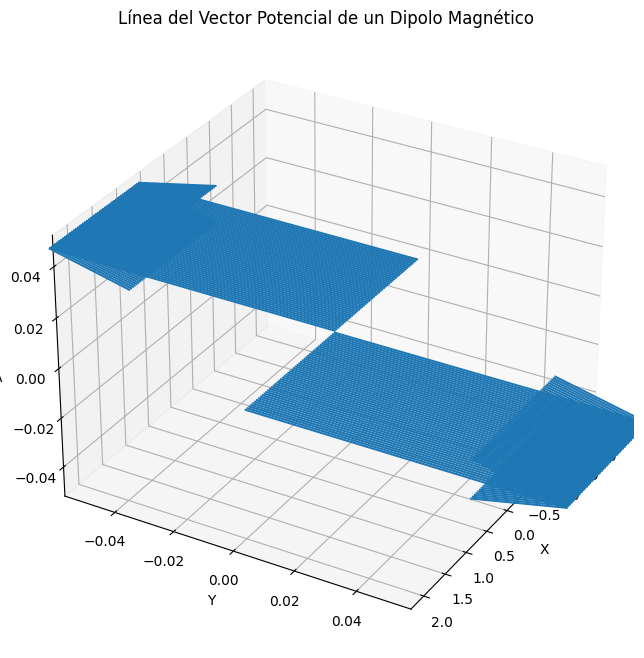

In [99]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def vector_potential_dipole(moment, x, y, z):
    """ Calcula el vector potencial de un dipolo. """
    mu_0 = 4 * np.pi * 1E-7
    r = np.sqrt(x**2 + y**2 + z**2)
    r = np.where(r == 0, 1e-10, r)  # Evitar división por cero
    A = mu_0 / (4 * np.pi * r**3) * np.cross(moment, np.array([x, y, z]))
    return A

# Momento dipolar (alineado con el eje z)
moment = np.array([0, 0, 1])

# Crear una línea en el espacio
x_line = np.linspace(-2, 2, 100)
y_line = np.zeros_like(x_line)
z_line = np.zeros_like(x_line)

# Calcular el vector potencial a lo largo de la línea
A_line = np.array([vector_potential_dipole(moment, x, y, z) for x, y, z in zip(x_line, y_line, z_line)])

# Crear la figura
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Trazar la línea del vector potencial
ax.quiver(x_line, y_line, z_line, A_line[:, 0], A_line[:, 1], A_line[:, 2], length=0.1, normalize=True)

# Configuración de los ejes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('A')
ax.set_title('Línea del Vector Potencial de un Dipolo Magnético')
ax.view_init(elev=30, azim=30)  # Ajusta la vista inicial

plt.show()


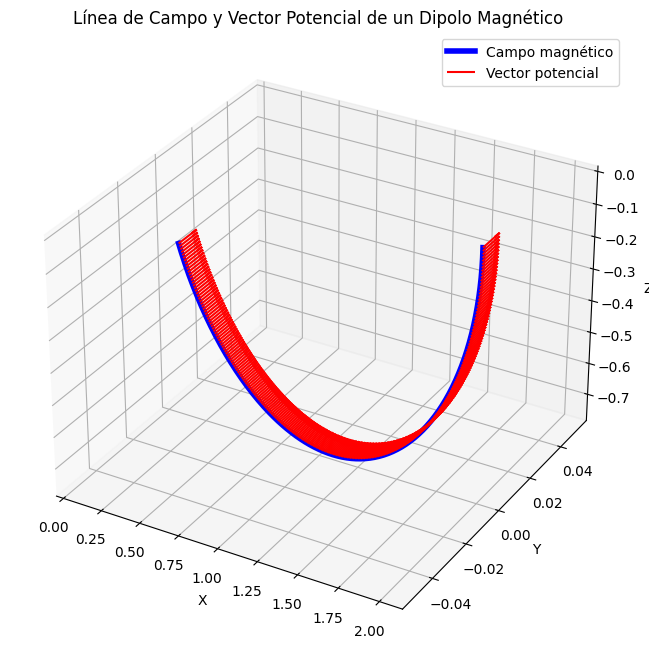

In [121]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import odeint

def magnetic_field_dipole(moment, r_vector):
    """ Calcula el campo magnético de un dipolo. """
    mu_0 = 4 * np.pi * 1E-7
    r = np.linalg.norm(r_vector)
    r_hat = r_vector / r
    B = (mu_0 / (4 * np.pi * r**3)) * (3 * np.dot(moment, r_hat) * r_hat - moment)
    return B

def vector_potential_dipole(moment, r_vector):
    """ Calcula el vector potencial de un dipolo. """
    mu_0 = 4 * np.pi * 1E-7
    r = np.linalg.norm(r_vector)
    A = mu_0 / (4 * np.pi * r**2) * np.cross(moment, r_vector)
    return A

def field_line(moment, start_point, steps, step_size):
    """ Integra la línea de campo magnético desde un punto de inicio. """
    def func(r, t):
        B = magnetic_field_dipole(moment, r)
        return B / np.linalg.norm(B) if np.linalg.norm(B) > 0 else [0, 0, 0]
    
    t = np.linspace(0, steps * step_size, steps)
    return odeint(func, start_point, t)

# Momento dipolar (alineado con el eje z)
moment = np.array([0, 0, 1])

# Punto de inicio para la línea de campo
start_point = np.array([2, 0, 0])

# Generar la línea de campo
line = field_line(moment, start_point, 250, 0.01)

# Calcular el vector potencial a lo largo de la línea de campo
A_line = np.array([vector_potential_dipole(moment, point) for point in line])

# Normalizar el vector potencial para visualización
A_line_normalized = A_line / np.linalg.norm(A_line, axis=1, keepdims=True)

# Crear la figura
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Trazar la línea de campo
ax.plot(line[:, 0], line[:, 1], line[:, 2], color='b', label='Campo magnético', lw=4)

# Trazar el vector potencial a lo largo de la línea de campo
ax.quiver(line[:, 0], line[:, 1], line[:, 2], A_line_normalized[:, 0], 
          A_line_normalized[:, 1], A_line_normalized[:, 2], length=0.01, color='r', label='Vector potencial')

# Configuración de los ejes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Línea de Campo y Vector Potencial de un Dipolo Magnético')
ax.legend()

plt.show()


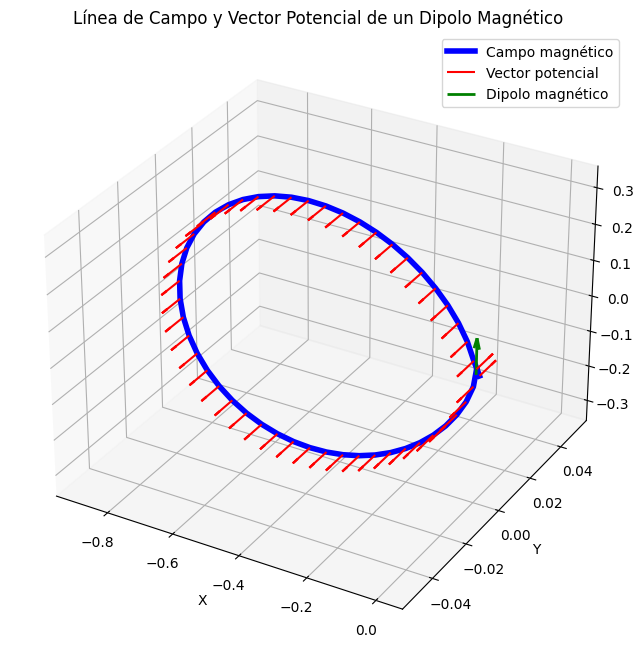

In [168]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import odeint

def magnetic_field_dipole(moment, r_vector):
    """ Calcula el campo magnético de un dipolo. """
    mu_0 = 4 * np.pi * 1E-7
    r = np.linalg.norm(r_vector)
    r_hat = r_vector / r
    B = (mu_0 / (4 * np.pi * r**3)) * (3 * np.dot(moment, r_hat) * r_hat - moment)
    return B

def vector_potential_dipole(moment, r_vector):
    """ Calcula el vector potencial de un dipolo. """
    mu_0 = 4 * np.pi * 1E-7
    r = np.linalg.norm(r_vector)
    A = mu_0 / (4 * np.pi * r**2) * np.cross(moment, r_vector)
    return A

def field_line(moment, start_point, steps, step_size):
    """ Integra la línea de campo magnético desde un punto de inicio. """
    def func(r, t):
        B = magnetic_field_dipole(moment, r)
        return B / np.linalg.norm(B) if np.linalg.norm(B) > 0 else [0, 0, 0]
    
    t = np.linspace(0, steps * step_size, steps)
    return odeint(func, start_point, t)

# Momento dipolar (alineado con el eje z)
moment = np.array([0, 0, 1])

# Punto de inicio para la línea de campo
start_point = np.array([0.01, 0, 0])

# Generar la línea de campo
line = field_line(moment, start_point, 50, 0.05)

# Calcular el vector potencial a lo largo de la línea de campo
A_line = np.array([vector_potential_dipole(moment, point) for point in line])

# Normalizar el vector potencial para visualización
A_line_normalized = A_line / np.linalg.norm(A_line, axis=1, keepdims=True)

# Crear la figura
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Trazar la línea de campo
ax.plot(line[:, 0], line[:, 1], line[:, 2], color='b', label='Campo magnético', lw=4)

# Trazar el vector potencial a lo largo de la línea de campo
ax.quiver(line[:, 0], line[:, 1], line[:, 2], A_line_normalized[:, 0], A_line_normalized[:, 1], 
          A_line_normalized[:, 2], length=0.01, color='r', label='Vector potencial')

# Trazar una flecha representativa del dipolo magnético
ax.quiver(0, 0, 0, moment[0], moment[1], moment[2], length=0.1, color='g', linewidth=2, label='Dipolo magnético')

# Configuración de los ejes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Línea de Campo y Vector Potencial de un Dipolo Magnético')
ax.legend()

plt.show()


# Campo por dos imanes

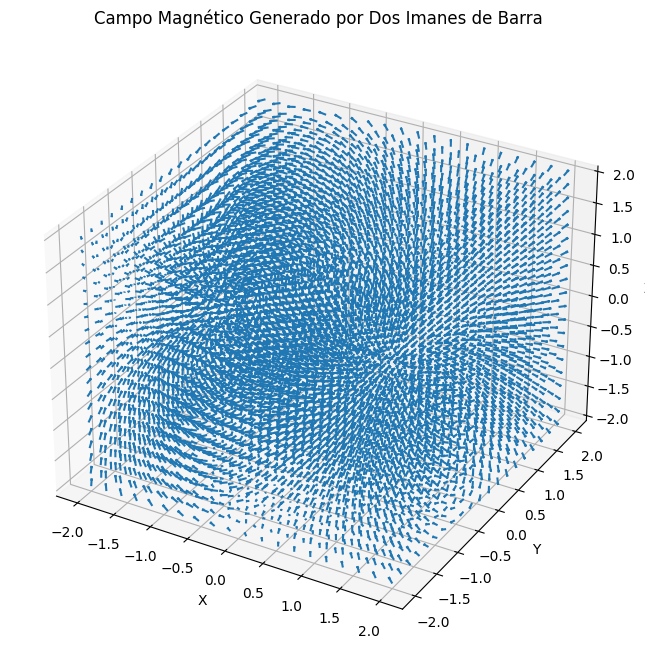

In [169]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def magnetic_field_dipole(moment, position, r):
    """ Calcula el campo magnético de un dipolo en la posición r. """
    mu_0 = 4 * np.pi * 1E-7
    r_vec = r - position
    r_mag = np.linalg.norm(r_vec)
    r_unit = r_vec / r_mag
    B = mu_0 / (4 * np.pi * r_mag**3) * (3 * np.dot(moment, r_unit) * r_unit - moment)
    return B

# Momentos dipolares de los imanes (orientados en direcciones diferentes)
moment1 = np.array([1, 0, 0])  # Iman 1 orientado a lo largo del eje x
moment2 = np.array([0, 1, 0])  # Iman 2 orientado a lo largo del eje y

# Posiciones de los imanes
position1 = np.array([-1, 0, 0])  # Iman 1 posicionado en x = -1
position2 = np.array([1, 0, 0])   # Iman 2 posicionado en x = 1

# Grilla de puntos en el espacio para calcular el campo magnético
x = np.linspace(-2, 2, 20)
y = np.linspace(-2, 2, 20)
z = np.linspace(-2, 2, 20)
X, Y, Z = np.meshgrid(x, y, z)

# Calculo del campo magnético total
Bx, By, Bz = np.zeros_like(X), np.zeros_like(Y), np.zeros_like(Z)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        for k in range(X.shape[2]):
            r = np.array([X[i, j, k], Y[i, j, k], Z[i, j, k]])
            B = magnetic_field_dipole(moment1, position1, r) + magnetic_field_dipole(moment2, position2, r)
            Bx[i, j, k], By[i, j, k], Bz[i, j, k] = B

# Visualización
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.quiver(X, Y, Z, Bx, By, Bz, length=0.1, normalize=True)

# Etiquetas y título
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Campo Magnético Generado por Dos Imanes de Barra')

plt.show()


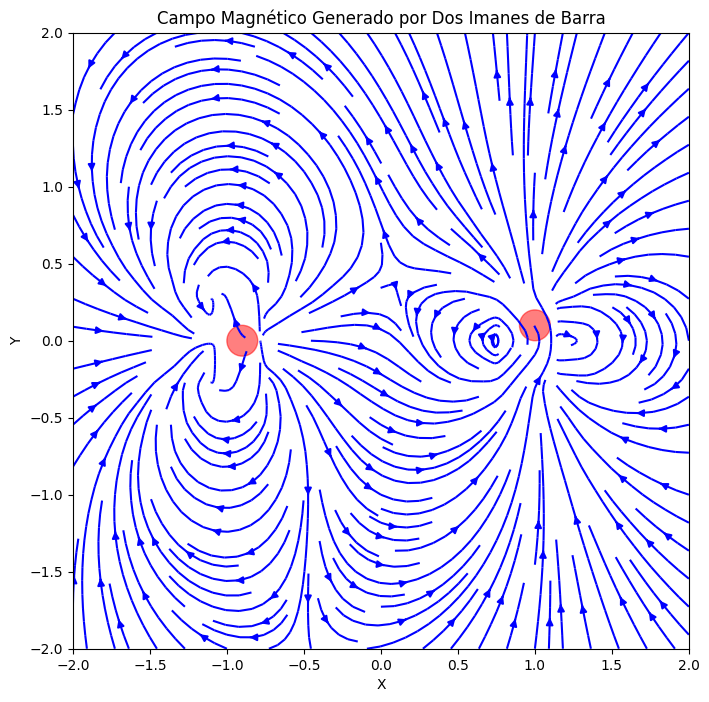

In [170]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import Circle
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

def magnetic_field_dipole(moment, position, r):
    """ Calcula el campo magnético de un dipolo en la posición r. """
    mu_0 = 4 * np.pi * 1E-7
    r_vec = r - position
    r_mag = np.linalg.norm(r_vec)
    r_unit = r_vec / r_mag
    B = mu_0 / (4 * np.pi * r_mag**3) * (3 * np.dot(moment, r_unit) * r_unit - moment)
    return B

def draw_cylinder(position, direction, length=1, radius=0.1):
    """ Dibuja un cilindro que representa el imán. """
    z = np.linspace(0, length, 100)
    x = np.linspace(radius, radius, 100)
    y = np.linspace(0, 0, 100)
    return np.vstack((x, y, z)).T @ direction + position

# Momentos dipolares y posiciones de los imanes
moment1 = np.array([1, 0, 0])
moment2 = np.array([0, 1, 0])
position1 = np.array([-1, 0, 0])
position2 = np.array([1, 0, 0])

# Grilla de puntos para calcular el campo magnético
x = np.linspace(-2, 2, 20)
y = np.linspace(-2, 2, 20)
X, Y = np.meshgrid(x, y)
Z = np.zeros_like(X)

# Calculo del campo magnético total en el plano XY
Bx, By = np.zeros_like(X), np.zeros_like(Y)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        r = np.array([X[i, j], Y[i, j], Z[i, j]])
        B = magnetic_field_dipole(moment1, position1, r) + magnetic_field_dipole(moment2, position2, r)
        Bx[i, j], By[i, j] = B[0], B[1]

# Visualización
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)

# Dibujar líneas de campo
ax.streamplot(X, Y, Bx, By, color='b', density=1.5)

# Dibujar cilindros que representan los imanes
for pos, direction in zip([position1, position2], [moment1, moment2]):
    cylinder = draw_cylinder(pos[:2], np.array([[direction[0], direction[1]], [-direction[1], direction[0]], [0, 0]]))
    ax.add_patch(Circle((cylinder[50, 0], cylinder[50, 1]), radius=0.1, color='r', alpha=0.5))

# Configuración de los ejes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_aspect('equal', 'box')
ax.set_title('Campo Magnético Generado por Dos Imanes de Barra')

plt.show()


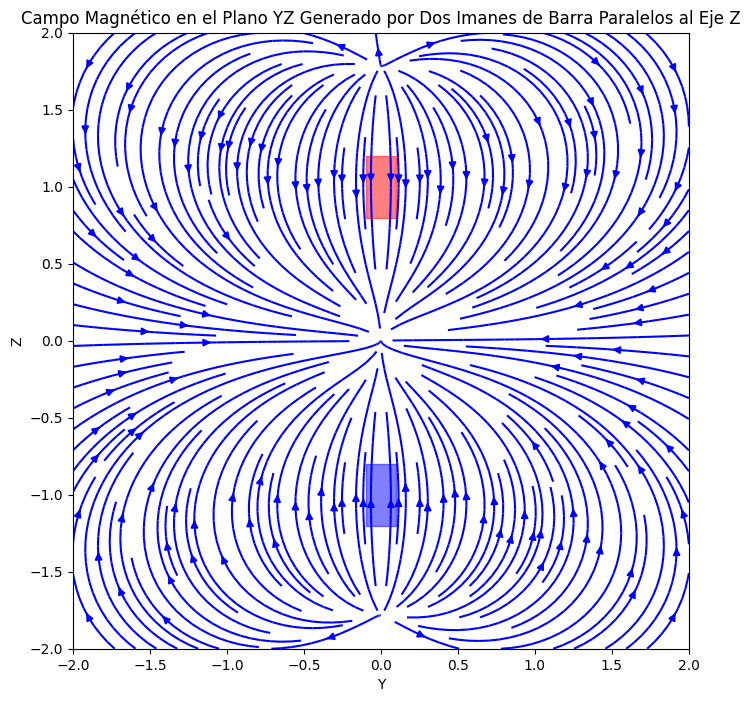

In [178]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

def magnetic_field_dipole(moment, position, r):
    """ Calcula el campo magnético de un dipolo en la posición r. """
    mu_0 = 4 * np.pi * 1E-7
    r_vec = r - position
    r_mag = np.linalg.norm(r_vec)
    r_unit = r_vec / r_mag
    B = mu_0 / (4 * np.pi * r_mag**3) * (3 * np.dot(moment, r_unit) * r_unit - moment)
    return B

# Momentos dipolares y posiciones de los imanes
moment1 = np.array([0, 0, 1])  # Orientado a lo largo del eje Z
moment2 = np.array([0, 0, -1]) # Orientado a lo largo del eje Z pero en dirección opuesta
position1 = np.array([1, 0, 1])  # A cierta altura en el eje Z
position2 = np.array([-1, 0, -1]) # A otra altura en el eje Z

# Grilla de puntos para calcular el campo magnético
y = np.linspace(-2, 2, 40)
z = np.linspace(-2, 2, 40)
Y, Z = np.meshgrid(y, z)
X = np.zeros_like(Y)

# Calculo del campo magnético total en el plano YZ
By, Bz = np.zeros_like(Y), np.zeros_like(Z)
for i in range(Y.shape[0]):
    for j in range(Y.shape[1]):
        r = np.array([X[i, j], Y[i, j], Z[i, j]])
        B = magnetic_field_dipole(moment1, position1, r) + magnetic_field_dipole(moment2, position2, r)
        By[i, j], Bz[i, j] = B[1], B[2]

# Visualización
fig, ax = plt.subplots(figsize=(8, 8))

# Dibujar líneas de campo
ax.streamplot(Y, Z, By, Bz, color='b', density=2)

# Dibujar rectángulos que representan los imanes
rect_height = 0.4
rect_width = 0.2
ax.add_patch(Rectangle((position1[1] - rect_width / 2, position1[2] - rect_height / 2), 
                       rect_width, rect_height, color='r', alpha=0.5))
ax.add_patch(Rectangle((position2[1] - rect_width / 2, position2[2] - rect_height / 2), 
                       rect_width, rect_height, color='b', alpha=0.5))

# Configuración de los ejes
ax.set_xlabel('Y')
ax.set_ylabel('Z')
ax.set_aspect('equal', 'box')
ax.set_title('Campo Magnético en el Plano YZ Generado por Dos Imanes de Barra Paralelos al Eje Z')

plt.show()


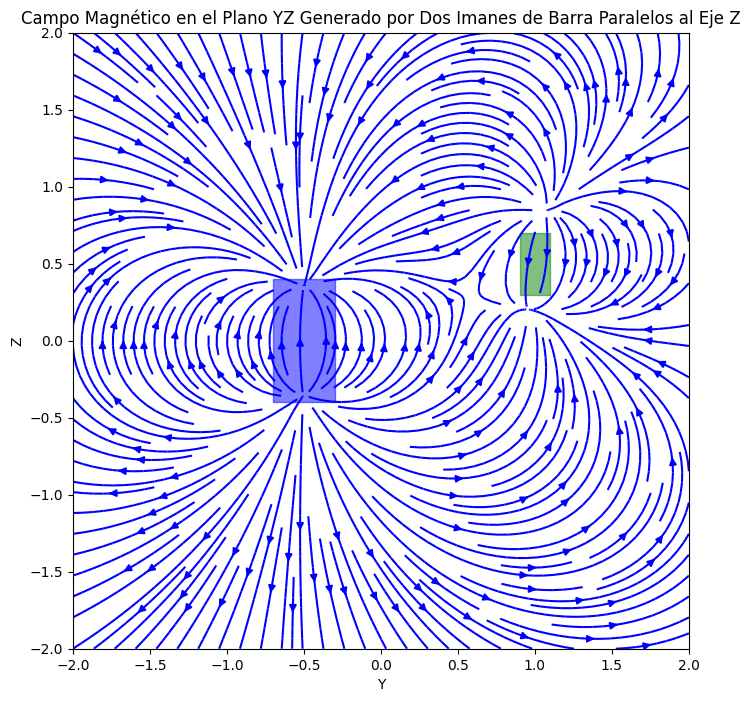

In [190]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

def magnetic_field_dipole(moment, position, r):
    """ Calcula el campo magnético de un dipolo en la posición r. """
    mu_0 = 4 * np.pi * 1E-7
    r_vec = r - position
    r_mag = np.linalg.norm(r_vec)
    r_unit = r_vec / r_mag
    B = mu_0 / (4 * np.pi * r_mag**3) * (3 * np.dot(moment, r_unit) * r_unit - moment)
    return B

# Momentos dipolares y posiciones de los imanes
moment1 = np.array([0, 0, 1])  # Orientado a lo largo del eje Z
moment2 = np.array([0, 0, -5]) # Orientado a lo largo del eje Z pero en dirección opuesta
position1 = np.array([0.5, 1, 0.5]) # Primera posición en el espacio
position2 = np.array([-0.5, -0.5, 0]) # Segunda posición en el espacio

# Grilla de puntos para calcular el campo magnético
y = np.linspace(-2, 2, 40)
z = np.linspace(-2, 2, 40)
Y, Z = np.meshgrid(y, z)
X = np.zeros_like(Y)

# Calculo del campo magnético total en el plano YZ
By, Bz = np.zeros_like(Y), np.zeros_like(Z)
for i in range(Y.shape[0]):
    for j in range(Y.shape[1]):
        r = np.array([X[i, j], Y[i, j], Z[i, j]])
        B = magnetic_field_dipole(moment1, position1, r) + magnetic_field_dipole(moment2, position2, r)
        By[i, j], Bz[i, j] = B[1], B[2]

# Visualización
fig, ax = plt.subplots(figsize=(8, 8))

# Dibujar líneas de campo
ax.streamplot(Y, Z, By, Bz, color='b', density=2)

# Dibujar rectángulos que representan los imanes
rect_height = 0.4
rect_width = 0.2
ax.add_patch(Rectangle((position1[1] - rect_width / 2, position1[2] - rect_height / 2), 
                       rect_width, rect_height, color='g', alpha=0.5))
ax.add_patch(Rectangle((position2[1] - rect_width*2 / 2, position2[2] - rect_height*2 / 2), 
                       rect_width*2, rect_height*2, color='b', alpha=0.5))

# Configuración de los ejes
ax.set_xlabel('Y')
ax.set_ylabel('Z')
ax.set_aspect('equal', 'box')
ax.set_title('Campo Magnético en el Plano YZ Generado por Dos Imanes de Barra Paralelos al Eje Z')

plt.show()


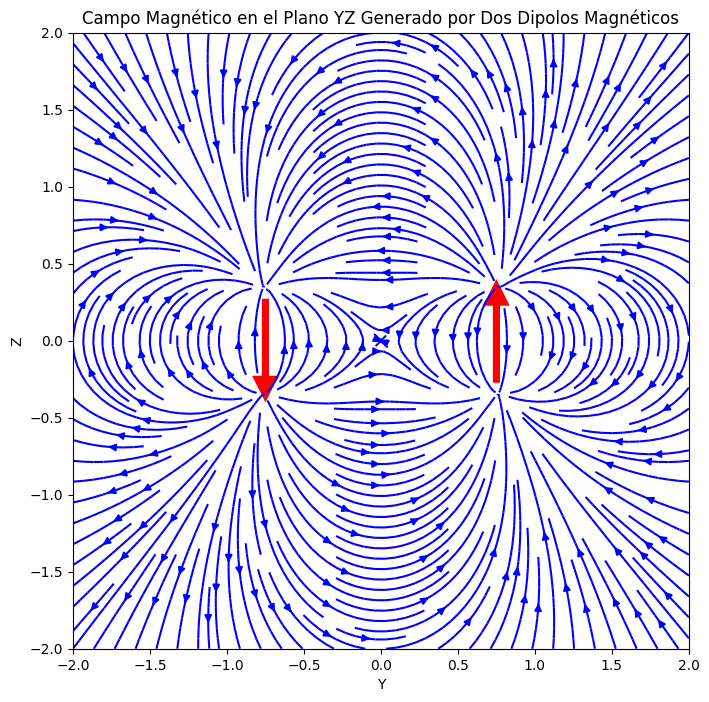

In [214]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

def magnetic_field_dipole(moment, position, r):
    """ Calcula el campo magnético de un dipolo en la posición r. """
    mu_0 = 4 * np.pi * 1E-7
    r_vec = r - position
    r_mag = np.linalg.norm(r_vec)
    r_unit = r_vec / r_mag
    B = mu_0 / (4 * np.pi * r_mag**3) * (3 * np.dot(moment, r_unit) * r_unit - moment)
    return B

# Momentos dipolares y posiciones de los imanes
moment1 = np.array([0, 0, 1])  # Orientado a lo largo del eje Z
moment2 = np.array([0, 0, -1]) # Orientado a lo largo del eje Z pero en dirección opuesta
position1 = np.array([0.5,  0.75, 0]) # Primera posición en el espacio
position2 = np.array([0.5, -0.75, 0]) # Segunda posición en el espacio

# Grilla de puntos para calcular el campo magnético
y = np.linspace(-2, 2, 40)
z = np.linspace(-2, 2, 40)
Y, Z = np.meshgrid(y, z)
X = np.zeros_like(Y)

# Calculo del campo magnético total en el plano YZ
By, Bz = np.zeros_like(Y), np.zeros_like(Z)
for i in range(Y.shape[0]):
    for j in range(Y.shape[1]):
        r = np.array([X[i, j], Y[i, j], Z[i, j]])
        B = magnetic_field_dipole(moment1, position1, r) + magnetic_field_dipole(moment2, position2, r)
        By[i, j], Bz[i, j] = B[1], B[2]

# Visualización
fig, ax = plt.subplots(figsize=(8, 8))

# Dibujar líneas de campo
ax.streamplot(Y, Z, By, Bz, color='b', density=2)

# Dibujar flechas que representan los dipolos magnéticos
plt.arrow(position1[1] - moment1[1]/4, position1[2] - moment1[2]/4, moment1[1], moment1[2]/2, 
          head_width=0.1, head_length=0.1, fc='r', ec='r', lw=5)
plt.arrow(position2[1] - moment2[1]/4, position2[2] - moment2[2]/4, moment2[1], moment2[2]/2, 
          head_width=0.1, head_length=0.1, fc='r', ec='r', lw=5)

# Configuración de los ejes
ax.set_xlabel('Y')
ax.set_ylabel('Z')
ax.set_aspect('equal', 'box')
ax.set_title('Campo Magnético en el Plano YZ Generado por Dos Dipolos Magnéticos')

plt.show()


# Campo que varía en el tiempo

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.patches as patches
import matplotlib.transforms as transforms
from IPython.display import HTML

# Parámetros del imán
B0 = 1.0  # Amplitud máxima del campo magnético
omega1 = 2.0 * np.pi / 8.0   # Frecuencia angular del primer imán
omega2 = 2.0 * np.pi / 12.0  # Frecuencia angular del segundo imán
length = 2.0  # Longitud de los imanes
width = 1.6   # Ancho de los imanes

# Configuración del espacio
x = np.linspace(-10, 10, 20)
y = np.linspace(-10, 10, 20)
X, Y = np.meshgrid(x, y)

# Posición de los imanes
pos1 = np.array([4, 0])
pos2 = np.array([-4, 0])

# Función para calcular el campo magnético
def B_field(t):
    angle1 = omega1 * t
    angle2 = omega2 * t
    m1 = np.array([np.cos(angle1), np.sin(angle1)])
    m2 = np.array([np.cos(angle2), np.sin(angle2)])

    r1 = np.sqrt((X - pos1[0])**2 + (Y - pos1[1])**2)
    r2 = np.sqrt((X - pos2[0])**2 + (Y - pos2[1])**2)

    Bx = B0 * ((3 * (m1[0]*(X-pos1[0]) + m1[1]*(Y-pos1[1])) * (X-pos1[0]) / r1**5) - m1[0] / r1**3)
    Bx += B0 * ((3 * (m2[0]*(X-pos2[0]) + m2[1]*(Y-pos2[1])) * (X-pos2[0]) / r2**5) - m2[0] / r2**3)

    By = B0 * ((3 * (m1[0]*(X-pos1[0]) + m1[1]*(Y-pos1[1])) * (Y-pos1[1]) / r1**5) - m1[1] / r1**3)
    By += B0 * ((3 * (m2[0]*(X-pos2[0]) + m2[1]*(Y-pos2[1])) * (Y-pos2[1]) / r2**5) - m2[1] / r2**3)

    return Bx, By

# Función para agregar imanes como rectángulos
def add_magnet(ax, pos, angle):
    # Desplazamiento inicial para cada parte del imán
    offset = length / 2

    # Crear el transformador para la rotación
    t = transforms.Affine2D().rotate_deg_around(pos[0], pos[1], angle) + ax.transData
    
    # Parte roja del imán (Polo norte)
    rect_north = patches.Rectangle((pos[0] - length, pos[1] - width / 2), length, width, color='red', alpha=1) #alpha=0.5)
    rect_north.set_transform(t)
    ax.add_patch(rect_north)

    # Parte azul del imán (Polo sur)
    rect_south = patches.Rectangle((pos[0], pos[1] - width / 2), length, width, color='blue', alpha=1) # alpha=0.5)
    rect_south.set_transform(t)
    ax.add_patch(rect_south)

# Creación de la figura
fig, ax = plt.subplots(figsize=(7, 7))

# Función de animación
def animate(i):
    ax.clear()
    ax.set_xlim(-10, 10)
    ax.set_ylim(-10, 10)
    Bx, By = B_field(i / 10.0)
    ax.streamplot(X, Y, Bx, By, density=1.5, color='#3CB44B', linewidth=2.3)

    # Ángulos de los imanes
    angle1 = np.degrees(omega1 * i / 10.0)
    angle2 = np.degrees(omega2 * i / 10.0)

    # Dibujar imanes
    add_magnet(ax, pos1, angle1)
    add_magnet(ax, pos2, angle2)
    
    ax.set_title(f"áng izq: {angle2:.0f}° | áng der: {angle1:.0f}°", fontsize=28)
    
    # Guardamos los frames específicos como imágenes
    if i in [0, 20, 40, 60, 80, 100]:
        plt.savefig(f"frame_mag_{i}.png")

# Creación y ejecución de la animación
ani = animation.FuncAnimation(fig, animate, frames=101, interval=50)

HTML(ani.to_jshtml())


## Juntar los frames en una sola imagen

In [ ]:
ani.save('campo_magnetico_dos_imanes.mp4', writer='ffmpeg', fps=10)

In [269]:
from PIL import Image

def concatenate_images(image_paths):
    # Abrir todas las imágenes usando PIL
    images = [Image.open(path) for path in image_paths]

    # Recortar un 7% de cada lado de cada imagen
    cropped_images = []
    for img in images:
        width, height = img.size
        left_margin = width * 0.07  # 10% de recorte en el lado izquierdo
        right_margin = width * 0.07  # 10% de recorte en el lado derecho
        cropped_images.append(img.crop((left_margin, 0, width - right_margin, height)))

    # Concatenar las imágenes recortadas horizontalmente
    total_width = sum(img.width for img in cropped_images)
    max_height = max(img.height for img in cropped_images)
    combined_img = Image.new('RGB', (total_width, max_height))

    x_offset = 0
    for img in cropped_images:
        combined_img.paste(img, (x_offset, 0))
        x_offset += img.width

    # Guardar la imagen combinada
    combined_img.save('campo_mag_cambia_en_el_tiempo.png')
    combined_img.show()

# Lista de rutas de las imágenes (ajusta esto según tus necesidades)
image_paths = ['frame_mag_0.png', 'frame_mag_20.png', 'frame_mag_40.png', 
               'frame_mag_60.png', 'frame_mag_80.png', 'frame_mag_100.png']

concatenate_images(image_paths)
